In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#Importing the Data
from pandas_datareader import data as pdr
import fix_yahoo_finance as yf

!pip install yfinance --upgrade --no-cache-dir 
yf.pdr_override()

#For ability to mount drive
from google.colab import drive

#Modeling
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor

#Modeling Metrics 
from sklearn import metrics

  Created wheel for yfinance: filename=yfinance-0.1.45-cp36-none-any.whl size=14652 sha256=97ca708bcd84b283b3536fed798860ff5e9991682b9e70d64dbc0e2209fb1982
  Stored in directory: /tmp/pip-ephem-wheel-cache-8yy0rqyu/wheels/0c/d1/df/aa9a7744a4ac353cc9a1f2c3aaea7c1f457fc49de4286f2d88
Successfully built yfinance


In [3]:
#Mount Folder for Data 
drive.mount('/content/drive', force_remount=True)
%cd "/content/drive/My Drive/MLHW"

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive
/content/drive/My Drive/MLHW


In [11]:
df_full = pdr.get_data_yahoo("AAPL", start="2018-01-01").reset_index()

df_full.to_csv('output/AAPL.csv',index=False)


[*********************100%***********************]  1 of 1 downloaded


In [12]:
df_full.shape

(428, 7)

In [13]:
df_full.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-02,170.160004,172.300003,169.259995,172.259995,167.701889,25555900
1,2018-01-03,172.529999,174.550003,171.960007,172.229996,167.672668,29517900
2,2018-01-04,172.539993,173.470001,172.080002,173.029999,168.451508,22434600
3,2018-01-05,173.440002,175.369995,173.050003,175.000000,170.369385,23660000
4,2018-01-08,174.350006,175.610001,173.929993,174.350006,169.736588,20567800


In [14]:
df_full.describe()

,Open,High,Low,Close,Adj Close,Volume
count,428.000000,428.000000,428.000000,428.000000,428.000000,4.280000e+02
mean,189.269603,191.171963,187.492687,189.349802,186.869235,3.190345e+07
std,19.699378,19.786240,19.616016,19.702039,19.931605,1.361636e+07
min,143.979996,145.720001,142.000000,142.190002,140.505798,1.136200e+07
25%,174.087502,175.149994,172.712498,174.240005,171.164211,2.239458e+07
50%,188.365005,189.769997,186.779999,188.525002,185.567421,2.844490e+07
75%,204.292495,206.432495,202.992496,204.507500,203.391636,3.766038e+07
max,230.779999,233.470001,229.779999,232.070007,228.523819,9.624670e+07


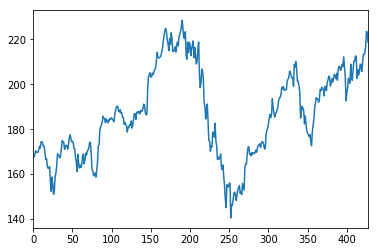

In [15]:
df_full["Adj Close"].plot()

In [22]:
df_full.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02,170.160004,172.300003,169.259995,172.259995,167.701889,25555900
2018-01-03,172.529999,174.550003,171.960007,172.229996,167.672668,29517900
2018-01-04,172.539993,173.470001,172.080002,173.029999,168.451508,22434600
2018-01-05,173.440002,175.369995,173.050003,175.000000,170.369385,23660000
2018-01-08,174.350006,175.610001,173.929993,174.350006,169.736588,20567800


In [23]:
df_full.set_index("Date", inplace=True)

KeyError: ignored

In [0]:
window_size=32
num_samples=len(df_full)-window_size

#Get the indices of accesss for the data
indices=np.arange(num_samples).astype(np.int)[:,None]+np.arange(window_size+1).astype(np.int)

#Create a 2d Matrix of Training Data with each row equating 1 day in the past 32 and the output for the 33rd day
data=df_full['Adj Close'].values[indices]
x = data[:,:-1]
y = data[:,-1]

In [0]:
split_fraction=0.8
ind_split=int(split_fraction*num_samples)

In [0]:
x_train = x[:ind_split]
y_train = y[:ind_split]
x_test = x[ind_split:]
y_test = y[ind_split:]

In [42]:
y_test.shape

(80,)

In [0]:
#Help Functions
def get_performance (model_pred):
  #Function returns standard performance metrics
  print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, model_pred).round(4))  
  print('Mean Squared Error:', metrics.mean_squared_error(y_test, model_pred).round(4))  
  print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, model_pred)).round(4))
  
  
def get_plot (model_pred):
  plt.scatter(model_pred, y_test, color="blue")
  plt.plot(y_test, y_test, color='red', linewidth=2)

In [0]:
y_pred_lag=np.roll(y_test,1)

In [53]:
get_performance(y_pred_lag)

Mean Absolute Error: 2.9604
Mean Squared Error: 27.7963
Root Mean Squared Error: 5.2722


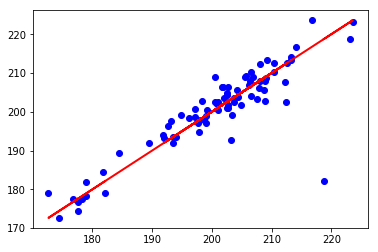

In [54]:
get_plot(y_pred_lag)

In [55]:
#Linear Regression
model_lr=LinearRegression()
model_lr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
y_pred_lr=model_lr.predict(x_test)

In [57]:
get_performance(y_pred_lr)

Mean Absolute Error: 2.9298
Mean Squared Error: 13.76
Root Mean Squared Error: 3.7094


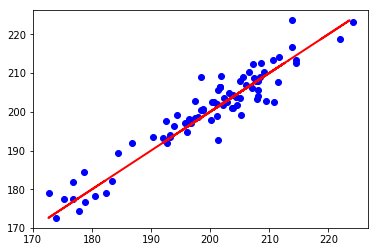

In [58]:
get_plot(y_pred_lr)

In [0]:
#Ridge Regression
model_ridge = Ridge()
model_ridge.fit(x_train, y_train)

y_pred_ridge=model_ridge.predict(x_test)

In [61]:
get_performance(y_pred_ridge)

Mean Absolute Error: 2.9295
Mean Squared Error: 13.7576
Root Mean Squared Error: 3.7091


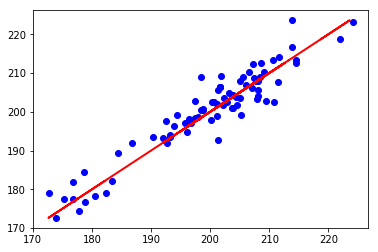

In [62]:
get_plot(y_pred_ridge)

In [0]:
#Gradient Boosting Trees
model_gb = GradientBoostingRegressor()
model_gb.fit(x_train, y_train)

y_pred_gb = model_gb.predict(x_test)

In [64]:
get_performance(y_pred_gb)

Mean Absolute Error: 3.4998
Mean Squared Error: 17.692
Root Mean Squared Error: 4.2062


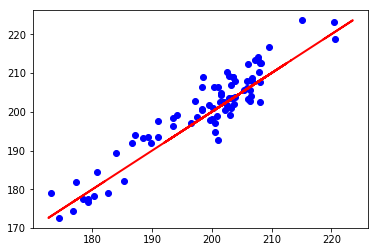

In [65]:
get_plot(y_pred_gb)

In [0]:
#Comparison
df_comp=pd.DataFrame({"lag":np.absolute(y_test-y_pred_lag),
                     "lr":np.absolute(y_test-y_pred_lr),
                     "ridge":np.absolute(y_test-y_pred_ridge),
                     "gb":np.absolute(y_test-y_pred_gb)})

(9, 20)

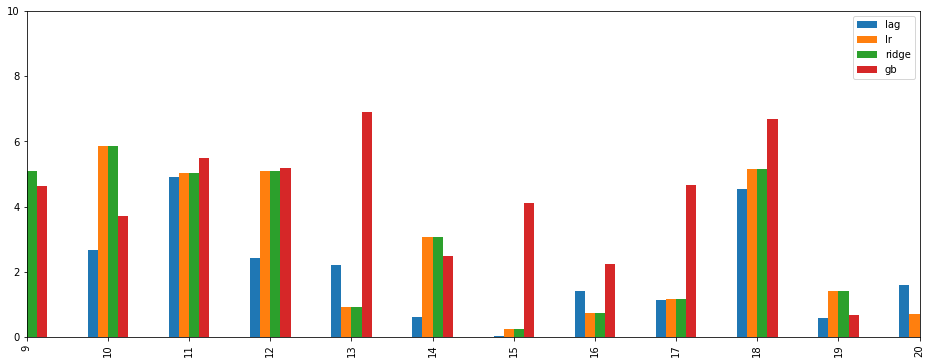

In [67]:
df_comp.plot.bar(figsize=(16, 6))
plt.ylim(0,10)
plt.xlim(9,20)